# Clustering Problem.

<b>Creator:</b> R.A. Fisher

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. <code>One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.</code>

<b>Attribute Information:</b><br>

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
    - Iris Setosa
    - Iris Versicolour
    - Iris Virginica



<b>NOTE :</b><br>This data differs from the data presented in Fishers article. The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features. 


In [1]:
# for installing scipy if you don't have it.
# !pip install scipy

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

#models:
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

# 1. Data preprocessing

### 1.1 Loading the data

In [3]:
df = pd.read_csv('iris.csv', header=None, names= ['sepal_length', 'sepal_width', 
                                                  'petal_length', 'petal_width', 'class'],
                index_col=None)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

### 1.2 Data Rectification

In [5]:
# correcting the 35th row to [4.9,3.1,1.5,0.2,"Iris-setosa"]

df.iloc[34] = [4.9,3.1,1.5,0.2,"Iris-setosa" ]
print('35th:',df.iloc[34],sep='\n')

# correcting the 38th row to [4.9,3.6,1.4,0.1,"Iris-setosa"]

df.iloc[36] = [4.9,3.6,1.4,0.1,"Iris-setosa"]
print('\n'+'38th:',df.iloc[36],sep='\n')

35th:
sepal_length            4.9
sepal_width             3.1
petal_length            1.5
petal_width             0.2
class           Iris-setosa
Name: 34, dtype: object

38th:
sepal_length            4.9
sepal_width             3.6
petal_length            1.4
petal_width             0.1
class           Iris-setosa
Name: 36, dtype: object


### 1.3 Data Cleaning

In [6]:
# check for missing values:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [7]:
# check for duplicate rows:
print('Number of duplicate values: ',df.duplicated().sum())

Number of duplicate values:  2


In [8]:
# dropping the duplicate values:
df = df.drop_duplicates()
df.sort_index(axis = 1)
df.shape

(148, 5)

### 1.4 Data Transformation

Iris-versicolor    50
Iris-setosa        49
Iris-virginica     49
Name: class, dtype: int64


<AxesSubplot:xlabel='class', ylabel='count'>

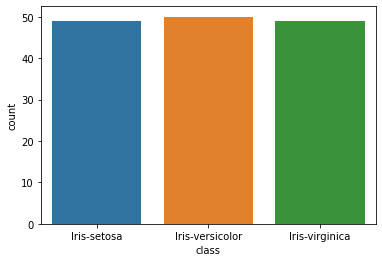

In [9]:
# label encoding the class column (manual):
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
print(df['class'].value_counts())
sns.countplot(x=df['class'])

In [10]:
# manual label encoding:
y = df['class']
n_y = []
for i in y:
    n_y.append(labels.index(i))
df['class'] = n_y

In [11]:
df['class'].value_counts()

1    50
0    49
2    49
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

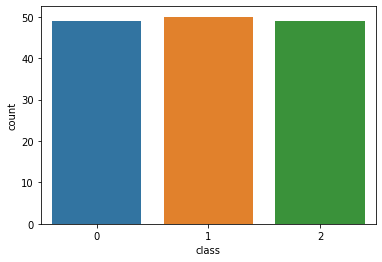

In [12]:
sns.countplot(x=df['class'])

# 2. Data Visualisation

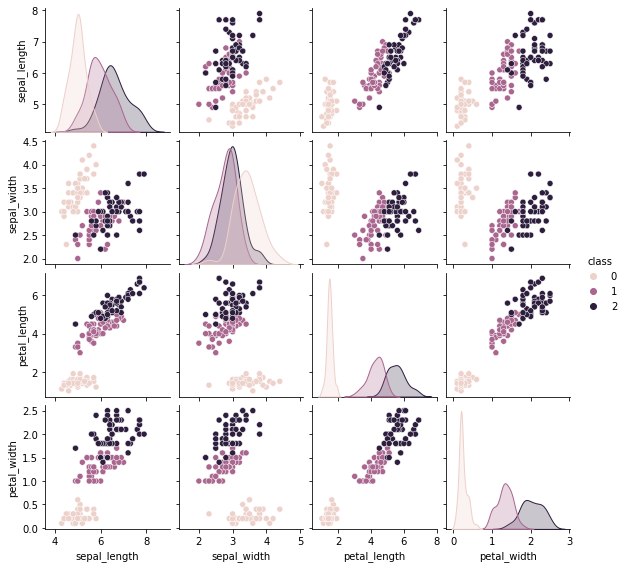

In [13]:
#Plot the dataset
sns.pairplot(df, hue="class", height=2, diag_kind="kde")
plt.show()

##### Insights:
- As mentioned in the discription, 1 class i.e. the 0th class can be linearly seprated but the others seem to overlap over the other.

# 3. Data Preparation

In [14]:
# Splitting the data into X and y terms

X, y = df.drop('class', axis=1), df['class']
print('shape of X: ',X.shape)
print('shape of y: ',y.shape)

shape of X:  (148, 4)
shape of y:  (148,)


# 4. Model Building 

## 4.1 K-means Clustering

In [15]:
# from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=121)
y_pred = kmeans.fit_predict(X)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 2 4 4 4 2 4 2 2 4 2 4 2 4 4 2 4 2 4 2 4 4 4
 4 4 4 4 2 2 2 2 4 2 4 4 4 2 2 2 4 2 2 2 2 2 4 2 2 1 4 3 1 1 3 2 3 1 3 1 1
 1 4 1 1 1 3 3 4 1 4 3 4 1 3 4 4 1 3 3 3 1 4 4 3 1 1 4 1 1 1 1 1 1 4 1 1 4]


In [16]:
# you check the centroids that were created by the model
kmeans.cluster_centers_

array([[4.99591837, 3.42653061, 1.46530612, 0.24693878],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.508     , 2.6       , 3.908     , 1.204     ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [6.21842105, 2.85789474, 4.73684211, 1.55526316]])

In [17]:
# define a colour palette
colour_palette = sns.color_palette("icefire", as_cmap=True)

<AxesSubplot:title={'center':'Original Clustering'}, xlabel='petal_width', ylabel='petal_length'>

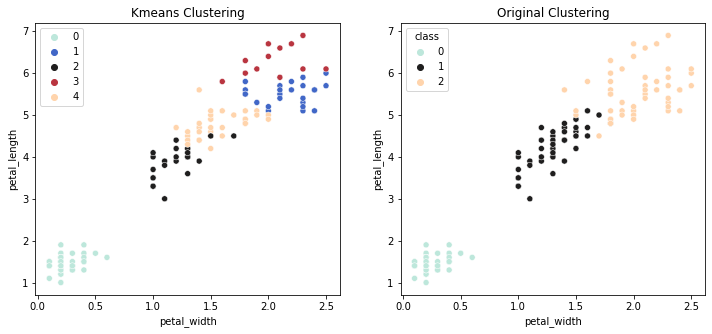

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Kmeans Clustering')
sns.scatterplot(x=X['petal_width'], y=X['petal_length'], 
                hue=y_pred, palette=colour_palette,)

plt.subplot(1,2,2)
plt.title('Original Clustering')
sns.scatterplot(x=X['petal_width'], y=X['petal_length'], 
                hue=y, palette=colour_palette)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


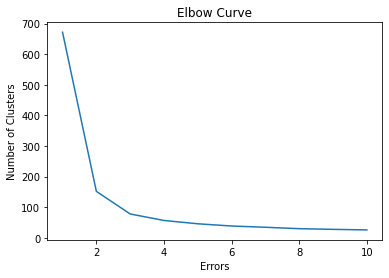

In [19]:
# use the elbow curve method to identify the ideal number of clusters.

error = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i).fit(X)
    kmeans.fit(X)
    error.append(kmeans.inertia_)
    
plt.plot(range(1,11), error)
plt.title('Elbow Curve')
plt.xlabel('Errors')
plt.ylabel('Number of Clusters')
plt.show()

<AxesSubplot:title={'center':'Original Clustering'}, xlabel='petal_width', ylabel='petal_length'>

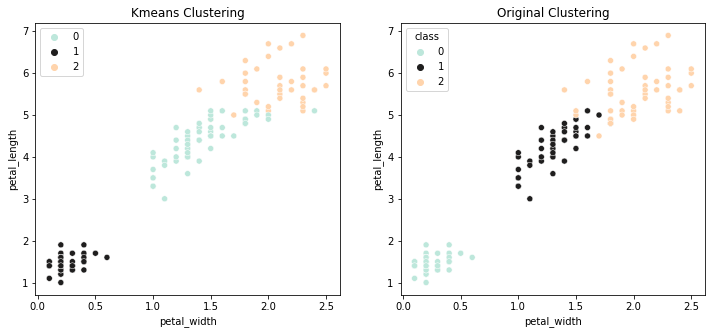

In [20]:
kmeans = KMeans(n_clusters=3, random_state=121)
y_pred = kmeans.fit_predict(X)

# plotting the new results
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Kmeans Clustering')
sns.scatterplot(x=X['petal_width'], y=X['petal_length'], 
                hue=y_pred, palette=colour_palette,)

plt.subplot(1,2,2)
plt.title('Original Clustering')
sns.scatterplot(x=X['petal_width'], y=X['petal_length'], 
                hue=y, palette=colour_palette)

In [21]:
# check the count differnece with respect to the graphs
print('Original Cluster Count: ',y.value_counts(), sep='\n', end='\n\n')
print('Predicted Cluster Count: ',pd.Series(y_pred).value_counts(), 
      sep='\n', end='\n\n')

Original Cluster Count: 
1    50
0    49
2    49
Name: class, dtype: int64

Predicted Cluster Count: 
0    61
1    49
2    38
dtype: int64



## 4.2 Hirarchical Clustering

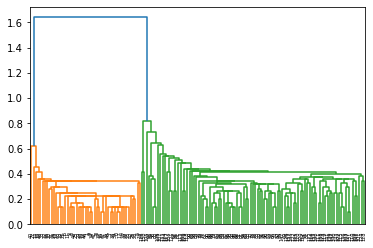

In [22]:
# from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

# Single Linkage
merging = linkage(X, method='single', metric='euclidean')
dendrogram(merging)
plt.show()

In [35]:
# identify the clusters:
clusters_labels_single = cut_tree(merging, n_clusters=3).reshape(-1,)
clusters_labels_single

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1])

Original Cluster Count: 
1    50
0    49
2    49
Name: class, dtype: int64

Predicted Cluster Count: 
1    63
0    49
2    36
dtype: int64



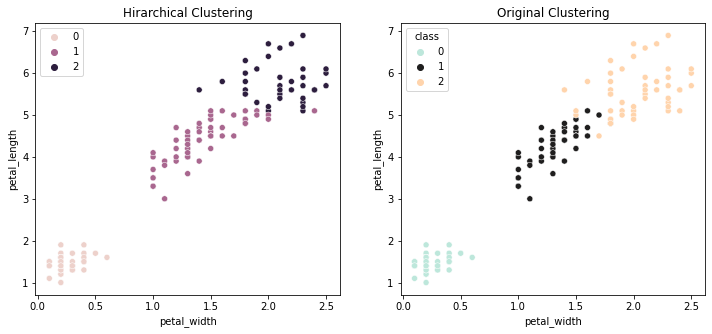

In [36]:
# plotting the new results
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Hirarchical Clustering')
sns.scatterplot(x=X['petal_width'], y=X['petal_length'], 
                hue=clusters_labels_single)

plt.subplot(1,2,2)
plt.title('Original Clustering')
sns.scatterplot(x=X['petal_width'], y=X['petal_length'], 
                hue=y, palette=colour_palette)

# check the count differnece with respect to the graphs
print('Original Cluster Count: ',y.value_counts(), sep='\n', end='\n\n')
print('Predicted Cluster Count: ',pd.Series(clusters_labels_single).value_counts(), 
      sep='\n', end='\n\n')

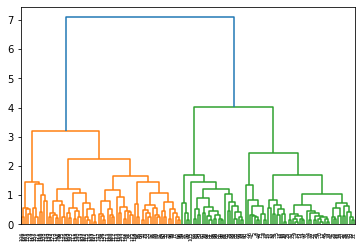

In [25]:
# Complete linkage
merging = linkage(X, method="complete", metric='euclidean')
dendrogram(merging)
plt.show()

In [37]:
# identify the clusters:
clusters_labels_complete = cut_tree(merging, n_clusters=3).reshape(-1,)
clusters_labels_complete

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1])

Original Cluster Count: 
1    50
0    49
2    49
Name: class, dtype: int64

Predicted Cluster Count: 
1    63
0    49
2    36
dtype: int64



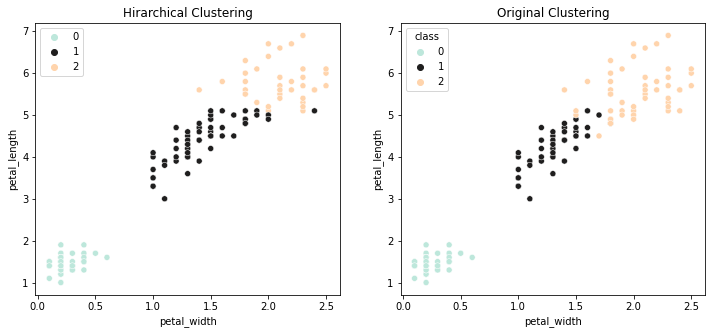

In [38]:
# plotting the new results
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Hirarchical Clustering')
sns.scatterplot(x=X['petal_width'], y=X['petal_length'], 
                hue=clusters_labels_complete, palette=colour_palette)

plt.subplot(1,2,2)
plt.title('Original Clustering')
sns.scatterplot(x=X['petal_width'], y=X['petal_length'], 
                hue=y, palette=colour_palette)

# check the count differnece with respect to the graphs
print('Original Cluster Count: ',y.value_counts(), sep='\n', end='\n\n')
print('Predicted Cluster Count: ',pd.Series(clusters_labels_complete).value_counts(), 
      sep='\n', end='\n\n')

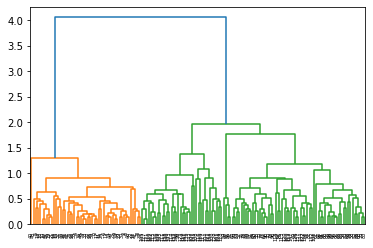

In [39]:
# average linking:
merging = linkage(X, method="average", metric='euclidean')
dendrogram(merging)
plt.show()

In [42]:
# identify the clusters:
clusters_labels_complete = cut_tree(merging, n_clusters=3).reshape(-1,)
clusters_labels_complete

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1])

Original Cluster Count: 
1    50
0    49
2    49
Name: class, dtype: int64

Predicted Cluster Count: 
1    63
0    49
2    36
dtype: int64



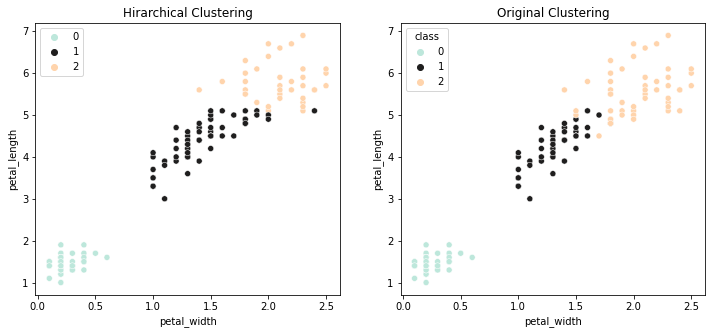

In [43]:
# plotting the new results
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Hirarchical Clustering')
sns.scatterplot(x=X['petal_width'], y=X['petal_length'], 
                hue=clusters_labels_complete, palette=colour_palette)

plt.subplot(1,2,2)
plt.title('Original Clustering')
sns.scatterplot(x=X['petal_width'], y=X['petal_length'], 
                hue=y, palette=colour_palette)

# check the count differnece with respect to the graphs
print('Original Cluster Count: ',y.value_counts(), sep='\n', end='\n\n')
print('Predicted Cluster Count: ',pd.Series(clusters_labels_complete).value_counts(), 
      sep='\n', end='\n\n')

## 4.3 DBScan

In [31]:
dbscan = DBSCAN()
db_clusters = dbscan.fit_predict(X)
db_clusters

# -1 refers to noise and shouldn't be considered as differnt cluster.

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

Original Cluster Count: 
1    50
0    49
2    49
Name: class, dtype: int64

Predicted Cluster Count: 
 1    83
 0    48
-1    17
dtype: int64



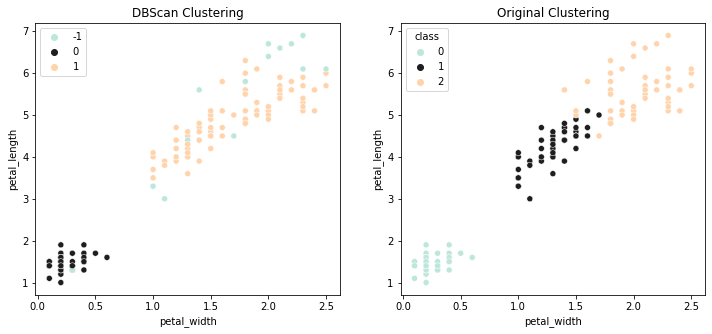

In [44]:
# plotting the new results
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('DBScan Clustering')
sns.scatterplot(x=X['petal_width'], y=X['petal_length'], 
                hue=db_clusters, palette=colour_palette)

plt.subplot(1,2,2)
plt.title('Original Clustering')
sns.scatterplot(x=X['petal_width'], y=X['petal_length'], 
                hue=y, palette=colour_palette)

# check the count differnece with respect to the graphs
print('Original Cluster Count: ',y.value_counts(), sep='\n', end='\n\n')
print('Predicted Cluster Count: ',pd.Series(db_clusters).value_counts(), 
      sep='\n', end='\n\n')

## 4.4 Predicting the Data

In [33]:
# Kmeans
y_pred_kmeans = kmeans.predict(X)

# Hierachical Clustering
y_pred_hierachical = cut_tree(merging, n_clusters=3).reshape(-1,)

# DBScan Prediction
y_pred_dbscan = dbscan.fit_predict(X)

In [45]:
# checking the Adjusted Rand Index (ARI)
from sklearn.metrics.cluster import adjusted_rand_score

# Kmeans preformance:
print("ARI fo kmeans: ", adjusted_rand_score(y, y_pred_kmeans))

# Hierachical preformance:
print("ARI fo Hierachical: ", adjusted_rand_score(y, y_pred_hierachical))

# DBScan preformance:
print("ARI fo DBScan: ", adjusted_rand_score(y, y_pred_dbscan))

ARI fo kmeans:  0.7400318593874596
ARI fo Hierachical:  0.7701416402260465
ARI fo DBScan:  0.5180407839232024


# 5. Home work
- Try to replicate somthing similar for the placement dataset.
- Remove the salary and the status column and then work on the rest of the columns.